In [35]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import CircleMarker
from IPython.display import IFrame
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.cluster import KMeansClusterer, cosine_distance
from sklearn.metrics import precision_recall_fscore_support
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn import cluster

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Questions to answer

# Make new columns IA% CA%

# Hiring trends of top companies(FAANG) through 2009 to 2019
# Total Companies that hired(IA,CA etc) H1b people through 2009 to 2019
# Any Change after Trump came in effect
# Best states by acceptance rate
# Denial rate of New and Old employees through 2009 to 2019
# Which sector(top, medium or low number employers) is best bet for H1b through 2009 to 2019
# Best and worst state as per acceptance rate through 2009 to 2019
# Best and worst Zip code as per acceptance rate through 2009 to 2019
# Make clusters of companies for best, good and bad categories

In [4]:
h1b_2009 = pd.read_csv("C:/Users/HP/Downloads/h1b_datahubexport-All/h1b_datahubexport-2009.csv", encoding = "ISO-8859-1")
h1b_2010 = pd.read_csv("C:/Users/HP/Downloads/h1b_datahubexport-All/h1b_datahubexport-2010.csv", encoding = "ISO-8859-1")
h1b_2011 = pd.read_csv("C:/Users/HP/Downloads/h1b_datahubexport-All/h1b_datahubexport-2011.csv", encoding = "ISO-8859-1")
h1b_2012 = pd.read_csv("C:/Users/HP/Downloads/h1b_datahubexport-All/h1b_datahubexport-2012.csv", encoding = "ISO-8859-1")
h1b_2013 = pd.read_csv("C:/Users/HP/Downloads/h1b_datahubexport-All/h1b_datahubexport-2013.csv", encoding = "ISO-8859-1")
h1b_2014 = pd.read_csv("C:/Users/HP/Downloads/h1b_datahubexport-All/h1b_datahubexport-2014.csv", encoding = "ISO-8859-1")
h1b_2015 = pd.read_csv("C:/Users/HP/Downloads/h1b_datahubexport-All/h1b_datahubexport-2015.csv", encoding = "ISO-8859-1")
h1b_2016 = pd.read_csv("C:/Users/HP/Downloads/h1b_datahubexport-All/h1b_datahubexport-2016.csv", encoding = "ISO-8859-1")
h1b_2017 = pd.read_csv("C:/Users/HP/Downloads/h1b_datahubexport-All/h1b_datahubexport-2017.csv", encoding = "ISO-8859-1")
h1b_2018 = pd.read_csv("C:/Users/HP/Downloads/h1b_datahubexport-All/h1b_datahubexport-2018.csv", encoding = "ISO-8859-1")
h1b_2019 = pd.read_csv("C:/Users/HP/Downloads/h1b_datahubexport-All/h1b_datahubexport-2019.csv", encoding = "ISO-8859-1")

In [5]:
frames = [h1b_2009, h1b_2010, h1b_2011, h1b_2012, h1b_2013, h1b_2014, h1b_2015, h1b_2016, h1b_2017, h1b_2018, h1b_2019]
H1B_all = pd.concat(frames)

H1B_all['Initial Approvals'] = H1B_all['Initial Approvals'].str.replace(",","").astype(float)
H1B_all['Initial Denials'] = H1B_all['Initial Denials'].str.replace(",","").astype(float)
H1B_all['Continuing Approvals'] = H1B_all['Continuing Approvals'].str.replace(",","").astype(float)
H1B_all['Continuing Denials'] = H1B_all['Continuing Denials'].str.replace(",","").astype(float)

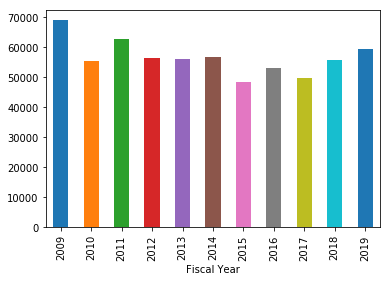

In [6]:
H1B_all.groupby('Fiscal Year')['Fiscal Year'].count().plot(kind='bar')

In [7]:
H1B_all.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP
0,2009,SAGINAW VLY ST UNIV,1.0,0.0,0.0,NaN,61,NaN,NaN,UNIVERSITY CENTER,NaN
1,2009,REGIONAL MED CTR BOARD,0.0,0.0,1.0,NaN,62,NaN,AL,ANNISTON,36202.0
2,2009,BIBB MED CTR BIBB COUNTY HEALTH CA,1.0,0.0,0.0,NaN,62,NaN,AL,CENTREVILLE,35042.0
3,2009,EMERGENCY MEDICAL SERVICES GROUP,0.0,0.0,1.0,NaN,62,NaN,AR,FORT SMITH,72917.0
4,2009,THE NEW FOUNDATION,0.0,1.0,0.0,NaN,61,NaN,AZ,SCOTTSDALE,85271.0


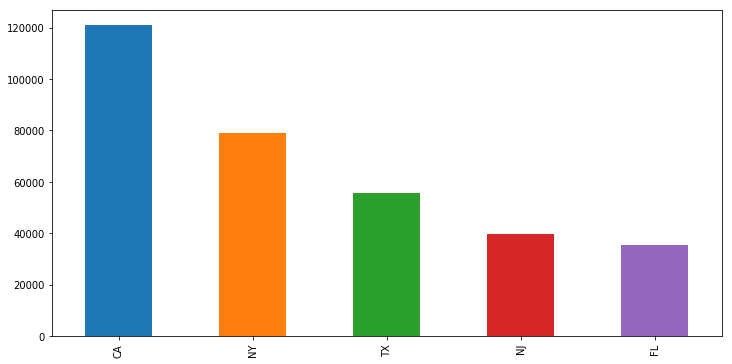

In [8]:
# Top States per H1-B approvals
H1B_all['State'].value_counts().head().plot(kind='bar',figsize=(12,6))

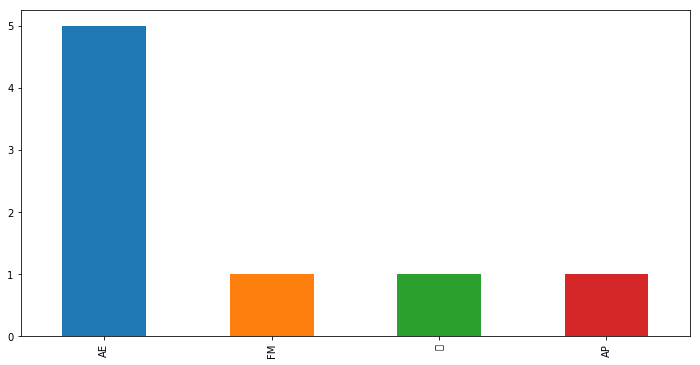

In [9]:
H1B_all['State'].value_counts().tail(4).plot(kind='bar',figsize=(12,6))

In [10]:
# Top Employers
Top_employers = H1B_all.groupby('Employer')['Initial Approvals'].sum().reset_index()
Top_employers = Top_employers.sort_values(by='Initial Approvals', ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

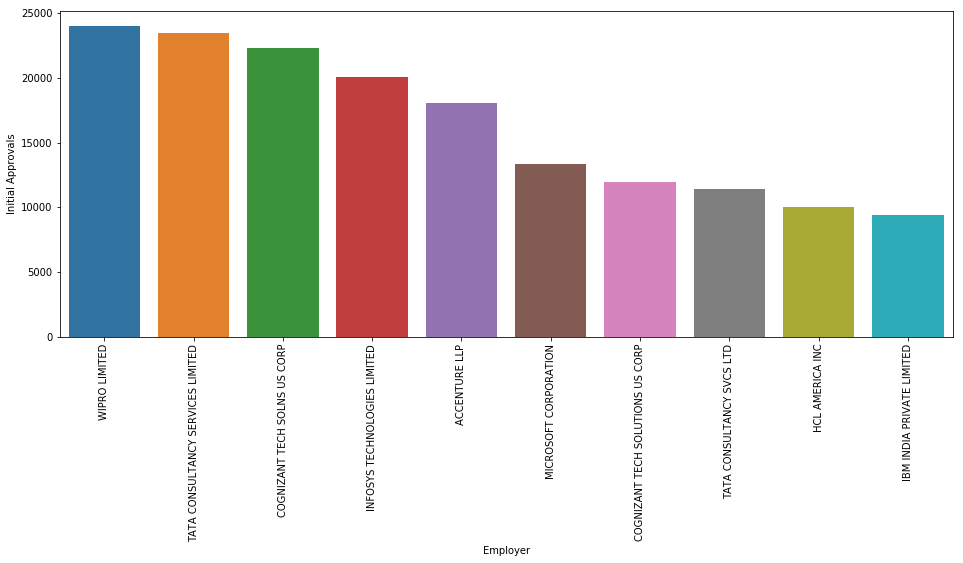

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

sns.barplot(x=Top_employers['Employer'].head(10),y=Top_employers['Initial Approvals'].head(10))
plt.xticks(rotation=90)

In [12]:
H1B_all['Initial Approvals %'] = round(H1B_all['Initial Approvals'] / (H1B_all['Initial Approvals'] + H1B_all['Initial Denials']),2)
H1B_all['Continuing Approvals %'] = round(H1B_all['Continuing Approvals'] / (H1B_all['Continuing Approvals'] + H1B_all['Continuing Denials']),2)

In [13]:
H1B_all.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP,Initial Approvals %,Continuing Approvals %
0,2009,SAGINAW VLY ST UNIV,1.0,0.0,0.0,NaN,61,NaN,NaN,UNIVERSITY CENTER,NaN,1.0,NaN
1,2009,REGIONAL MED CTR BOARD,0.0,0.0,1.0,NaN,62,NaN,AL,ANNISTON,36202.0,NaN,NaN
2,2009,BIBB MED CTR BIBB COUNTY HEALTH CA,1.0,0.0,0.0,NaN,62,NaN,AL,CENTREVILLE,35042.0,1.0,NaN
3,2009,EMERGENCY MEDICAL SERVICES GROUP,0.0,0.0,1.0,NaN,62,NaN,AR,FORT SMITH,72917.0,NaN,NaN
4,2009,THE NEW FOUNDATION,0.0,1.0,0.0,NaN,61,NaN,AZ,SCOTTSDALE,85271.0,0.0,NaN


In [14]:
# Top Employers by year
Top_H1b_Employers_by_year = H1B_all.groupby(['Fiscal Year','Employer'])['Initial Approvals'].sum().reset_index()
Top_H1b_Employers_by_year = Top_H1b_Employers_by_year.sort_values(by='Initial Approvals', ascending=False)
Top_H1b_Employers_by_year.groupby(['Fiscal Year'])['Employer'].first()

Fiscal Year
2009                        WIPRO LIMITED
2010    COGNIZANT TECHNOLOGY SOLUTIONS US
2011     COGNIZANT TECH SOLUTIONS US CORP
2012         COGNIZANT TECH SOLNS US CORP
2013    TATA CONSULTANCY SERVICES LIMITED
2014    TATA CONSULTANCY SERVICES LIMITED
2015            TATA CONSULTANCY SVCS LTD
2016         COGNIZANT TECH SOLNS US CORP
2017         COGNIZANT TECH SOLNS US CORP
2018      AMAZON FULFILLMENT SERVICES INC
2019              AMAZON.COM SERVICES INC
Name: Employer, dtype: object

In [15]:
# Acceptance rate per state
H1B_State_initial_Approval = H1B_all.groupby(['State'])['Initial Approvals'].sum()/(H1B_all.groupby(['State'])['Initial Approvals'].sum() + H1B_all.groupby(['State'])['Initial Denials'].sum())
H1B_State_Continuing_Approval = H1B_all.groupby(['State'])['Continuing Approvals'].sum()/(H1B_all.groupby(['State'])['Continuing Approvals'].sum() + H1B_all.groupby(['State'])['Continuing Denials'].sum())

#Count of cases per state
H1B_State_initial_case_count = H1B_all.groupby(['State'])['Initial Approvals'].sum() + H1B_all.groupby(['State'])['Initial Denials'].sum()
H1B_State_Continuing_case_count = H1B_all.groupby(['State'])['Continuing Approvals'].sum() + H1B_all.groupby(['State'])['Continuing Denials'].sum()

In [16]:
H1B_State_initial_Approval = H1B_State_initial_Approval.reset_index()
H1B_State_initial_Approval.columns = ['State','State_initial_Approval']

H1B_State_Continuing_Approval = H1B_State_Continuing_Approval.reset_index()
H1B_State_Continuing_Approval.columns = ['State','State_Continuing_Approval']

H1B_State_initial_case_count = H1B_State_initial_case_count.reset_index()
H1B_State_initial_case_count.columns = ['State','State_initial_case_count']

H1B_State_Continuing_case_count = H1B_State_Continuing_case_count.reset_index()
H1B_State_Continuing_case_count.columns = ['State','State_Continuing_case_count']

In [17]:
H1B_All = H1B_all.merge(H1B_State_initial_Approval, how='left', left_on=['State'], 
                         right_on=['State'])

H1B_All = H1B_All.merge(H1B_State_Continuing_Approval, how='left', left_on=['State'], 
                         right_on=['State'])

H1B_All = H1B_All.merge(H1B_State_initial_case_count, how='left', left_on=['State'], 
                         right_on=['State'])

H1B_All = H1B_All.merge(H1B_State_Continuing_case_count, how='left', left_on=['State'], 
                         right_on=['State'])

In [18]:
H1B_All.sort_values(by='State_initial_case_count',ascending=False)

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP,Initial Approvals %,Continuing Approvals %,State_initial_Approval,State_Continuing_Approval,State_initial_case_count,State_Continuing_case_count
622683,2019,BYTEDANCE INC,0.0,0.0,1.0,0.0,51,9999.0,CA,MENLO PARK,94025.0,NaN,1.00,0.953666,0.981340,225320.0,369184.0
253502,2013,KWANGWON USA INC,0.0,NaN,0.0,NaN,31,5741.0,CA,ONTARIO,91761.0,NaN,NaN,0.953666,0.981340,225320.0,369184.0
253394,2013,CHAN & ZHANG LLP,2.0,NaN,0.0,NaN,54,3569.0,CA,SAN GABRIEL,91776.0,NaN,NaN,0.953666,0.981340,225320.0,369184.0
253406,2013,ELEMENT CXI SERVICES CORP,1.0,NaN,0.0,NaN,33,6891.0,CA,SAN JOSE,95131.0,NaN,NaN,0.953666,0.981340,225320.0,369184.0
253409,2013,ADVANCED ELEMENTAL TECHNOLOGIES IN,0.0,NaN,0.0,NaN,99,3122.0,CA,DANVILLE,94527.0,NaN,NaN,0.953666,0.981340,225320.0,369184.0
253411,2013,PRIME VIEW DISPLAY INC,0.0,NaN,1.0,NaN,99,3736.0,CA,IRVINE,92618.0,NaN,NaN,0.953666,0.981340,225320.0,369184.0
253416,2013,K S M GARMENT INC,0.0,NaN,1.0,NaN,31,9397.0,CA,VERNON,90058.0,NaN,NaN,0.953666,0.981340,225320.0,369184.0
253426,2013,PROACTIVE TECHNICAL SERVICES INC,8.0,NaN,4.0,NaN,54,9668.0,CA,SAN JOSE,95129.0,NaN,NaN,0.953666,0.981340,225320.0,369184.0
253427,2013,BEAR DATA SOLUTIONS INC,0.0,NaN,1.0,NaN,54,9856.0,CA,SAN FRANCISCO,94105.0,NaN,NaN,0.953666,0.981340,225320.0,369184.0
253428,2013,ENLUME INC,1.0,NaN,0.0,NaN,54,9882.0,CA,CAMPBELL,95008.0,NaN,NaN,0.953666,0.981340,225320.0,369184.0


In [19]:
# Sort grouped column
H1B_All.groupby('State')['State_initial_Approval'].last().sort_values(ascending=False).head()

State
     1.000000
ID    0.982633
VT    0.979317
ND    0.977778
MT    0.976982
Name: State_initial_Approval, dtype: float64

In [20]:
zipcode_mapping = pd.read_csv('C:/Users/HP/Downloads/us-zip-code-latitude-and-longitude.csv',sep=';', quotechar=";")

In [21]:
zipcode_mapping = zipcode_mapping[['Zip','Latitude','Longitude']]
H1B_All_geo = H1B_All.merge(zipcode_mapping, how='left', left_on=['ZIP'], 
                         right_on=['Zip'])

In [22]:
n=200
Top_zip = H1B_All_geo.groupby('ZIP')['Initial Approvals'].sum().sort_values(ascending=False).reset_index().head(n)

In [23]:
top_zipcode_list = list(Top_zip['ZIP'].astype('int64'))

In [24]:
Lat_long_top_zipcodes = zipcode_mapping[zipcode_mapping['Zip'].isin(top_zipcode_list)]
Lat_long_top_zipcodes = Lat_long_top_zipcodes.reset_index(drop=True)

In [25]:
map_data = folium.Map(location=[43.8333333, -95.585522], zoom_start=4, tiles='Stamen Terrain',prefer_canvas=False)
    
for i in range(n):
    try:
        folium.Marker(
        location=[ Lat_long_top_zipcodes['Latitude'][i], Lat_long_top_zipcodes['Longitude'][i]], fill_color='#43d9de', radius=6,
        popup='Top zip code for H1-B approvals',
        icon=folium.Icon(color='red', icon='info-sign')).add_to(map_data)   
    except:
        continue        

In [26]:
map_data

In [27]:
# Best states
H1B_All_geo.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP,Initial Approvals %,Continuing Approvals %,State_initial_Approval,State_Continuing_Approval,State_initial_case_count,State_Continuing_case_count,Zip,Latitude,Longitude
0,2009,SAGINAW VLY ST UNIV,1.0,0.0,0.0,NaN,61,NaN,NaN,UNIVERSITY CENTER,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,REGIONAL MED CTR BOARD,0.0,0.0,1.0,NaN,62,NaN,AL,ANNISTON,36202.0,NaN,NaN,0.967460,0.989151,4456.0,5162.0,36202.0,33.762195,-85.837828
2,2009,BIBB MED CTR BIBB COUNTY HEALTH CA,1.0,0.0,0.0,NaN,62,NaN,AL,CENTREVILLE,35042.0,1.0,NaN,0.967460,0.989151,4456.0,5162.0,35042.0,32.963486,-87.138670
3,2009,EMERGENCY MEDICAL SERVICES GROUP,0.0,0.0,1.0,NaN,62,NaN,AR,FORT SMITH,72917.0,NaN,NaN,0.951550,0.984336,4644.0,8491.0,72917.0,35.191046,-94.238160
4,2009,THE NEW FOUNDATION,0.0,1.0,0.0,NaN,61,NaN,AZ,SCOTTSDALE,85271.0,0.0,NaN,0.953933,0.981530,13220.0,21657.0,85271.0,33.276539,-112.187170


In [28]:
State_cases = H1B_All_geo.groupby(['Fiscal Year','State'])['State_initial_case_count'].last().reset_index().sort_values(by='State')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

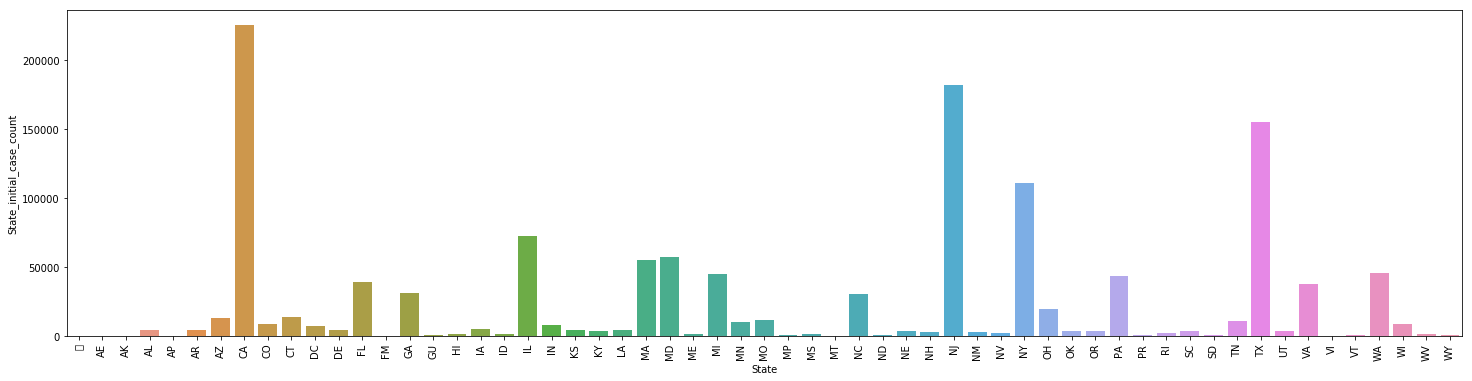

In [29]:
fig, ax = plt.subplots()
sns.barplot(x = State_cases['State'], y = State_cases['State_initial_case_count'])
fig.set_size_inches(25, 6)
plt.xticks(rotation=90)

State_initial_case_count    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

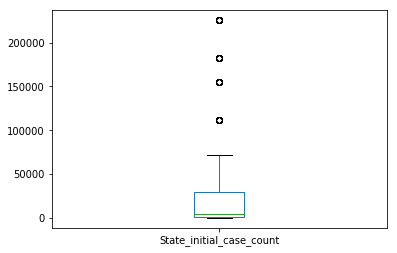

In [30]:
State_cases['State_initial_case_count'].plot(kind='box', subplots=True, sharex=False, sharey=False)
# These exceptionaly high cases would makes these states as top runners for H1-B filings